### Libraries

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy as sp

from scipy.optimize import fsolve, root_scalar

# Root Finding

Newtons Method: $$ x_{n+1} = x_n - \frac {f(x_n)}{f'(x_n)}$$

with a for loop

In [2]:
r=2

f = lambda x: 1-x-np.exp(-r*x)
fp = lambda x: -1+r*np.exp(-r*x)

tol = 1e-08
root = 0.4
for i in range(100000):
    root = root-f(root)/fp(root)  
    
# print(f"the root is {root}")

# Difference Equations

In [3]:
def logistic(x, r=3.9):
    return r*x*(1-x)

# logistic map for a few values of r

rs = [2.5, 3, 3.5, 3.9, 4.0, 4.1]
# rs = np.linspace(2.5, 4.0, 6)

# plt.figure(figsize=(12, 8))

for r in rs:
    xs = [0.1]

    for i in range(60):
        xs.append(logistic(xs[-1], r))
        
    # plt.subplot(2, 3, rs.index(r)+1)
    # plt.plot(xs, '--x')
    # plt.title(f"Logistic map with r={r}")

In [4]:
# bifurcation diagram for logistic map

rs = np.linspace(2, 4, 1000)

# plt.figure(figsize=(12, 8))

for r in rs:
    xs = [0.1]
    for i in range(1000):
        xs.append(logistic(xs[-1], r=r))

    # plt.plot([r]*len(xs[-20:]), xs[-20:], '.', markersize=1)

In [5]:
# finding 10-periodic solutions of the logistic map. these are groups

from scipy.optimize import fsolve
from functools import reduce 

period = 10


def composite(f, n):
    if n == 0:
        return lambda x: x
    return reduce(lambda f, g: lambda x: f(g(x)), [f]*n)


x = fsolve(lambda x: composite(logistic, period)(x)-x, 0.2)

# for i in range(period+1):
#     print(composite(logistic, i)(x))

# Numerical Differentiation

In [6]:
def fwd_diff(f, x, h=1e-8):
    return (f(x+h) - f(x)) / h

def ct_diff(f, x, h=1e-8):
    return (f(x+h) - f(x-h)) / (2*h)

## remove the below once they are memorized

forget them, think long time before looking up

In [7]:
# should know this by now. delete it from here

# numbers from 0 to 1 and step size is 0.001
xs1 = np.arange(0,1,0.001)

In [8]:
# should know this by now. delete it from here

# 1000 numbers from 0 to 1 linearly spaced
xs2 = np.linspace(0,1,1000)

In [9]:
# remove this cell if you are comfortable with python lists and slicing them

# list slicing.
xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# everything but last element
print(xs[:-1])

# neither first nor last
print(xs[1:-1])

# slice everything
print(xs[:])

# in reverse
print(xs[::-1])

# everything in steps of three
print(xs[::3])



[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[0, 3, 6, 9]


In [10]:
# remove this cell if you are comfortable with numpy matrices and slicing them

# matrix slicing
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

# first row. think of it like index the first row and grab everything
print(A[0,:])

# first column
print(A[:,0])

# first two rows
print(A[:2,:])

# last two columns
print(A[:,-2:])

A

[1 2 3]
[1 4 7]
[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]
 [8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

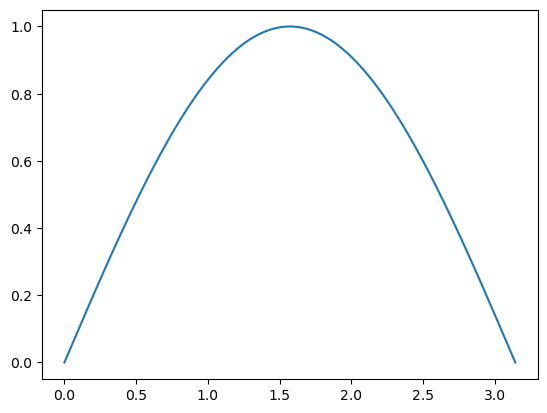

In [11]:
# remove this cell if you are comfortable with plotting

# basic plt.plot(): plotting sin(x), 100  x values from 0 to pi. 

xs = np.linspace(0,np.pi,i)
ys = np.sin(xs)

plt.plot(xs,ys)

In [12]:
# condition for even number. mod2 == 0. ie can remove 2 some number of times and left with 0.

for x in range(10):
    if x%2==0:
        print(x)

0
2
4
6
8
